# Iris dataset

### Visualization and application of simple machine learning model to iris dataset.

We will start by importing common packages rquired for data anlysis and visualization.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Reading the data

In [52]:
data_path = '../input/iris-data/Iris.csv'
data = pd.read_csv(data_path)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We can see that the dataset has four major features. The length and width of the sepals and petals of the flower species.

To understand better we can just google search fro the image of the flower of the plant species we are dealing with.

Here we will fir list out the species included in the dataset.


In [53]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

As seen above, we have three species  from genus 'Iris'.

The .info() function will tell us about the number and type of values present in each column of the dataset.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The dataset has 150 values in each column and none of the values are null.

We will now see if there is any correlation between the features.

In [55]:
# correlation
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Sepal-length, petal-length, and petal-width are hghly correlated.

## Plotting features with one another.

To visualize the data, we can plot different feature with one another into a scatter plot and colour code it with the species.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

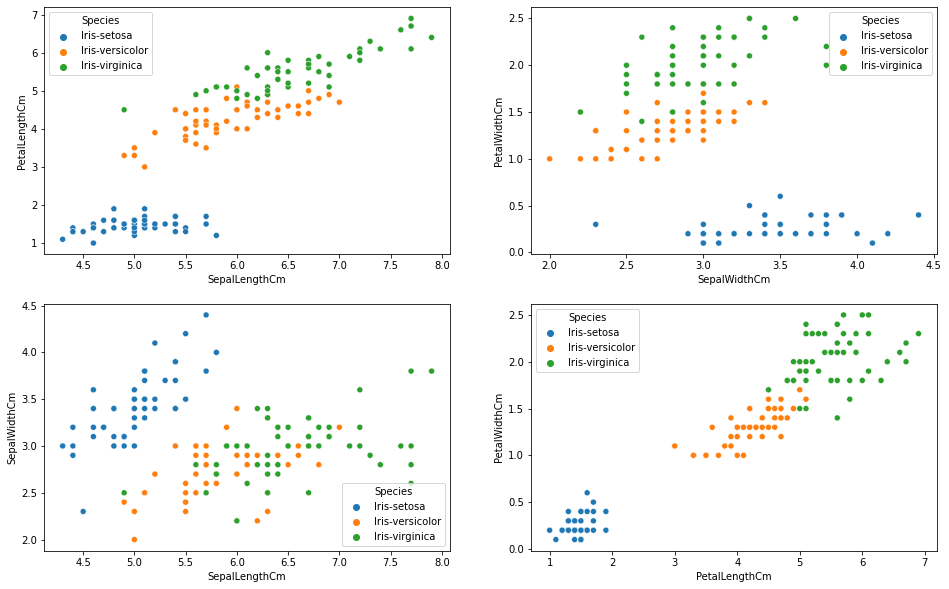

In [56]:
fig, ax = plt.subplots(2,2, figsize=(16,10))
sns.scatterplot(data=data,
                x='SepalLengthCm',
                y='PetalLengthCm',
                hue='Species',
                ax=ax[0,0])

sns.scatterplot(data=data,
                x='SepalWidthCm',
                y='PetalWidthCm',
                hue='Species',
                ax=ax[0,1])

sns.scatterplot(data=data,
                x='SepalLengthCm',
                y='SepalWidthCm',
                hue='Species',
                ax=ax[1,0])

sns.scatterplot(data=data,
                x='PetalLengthCm',
                y='PetalWidthCm',
                hue='Species',
                ax=ax[1,1])

Also, we can plot the distribution of values of the species features using boxplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


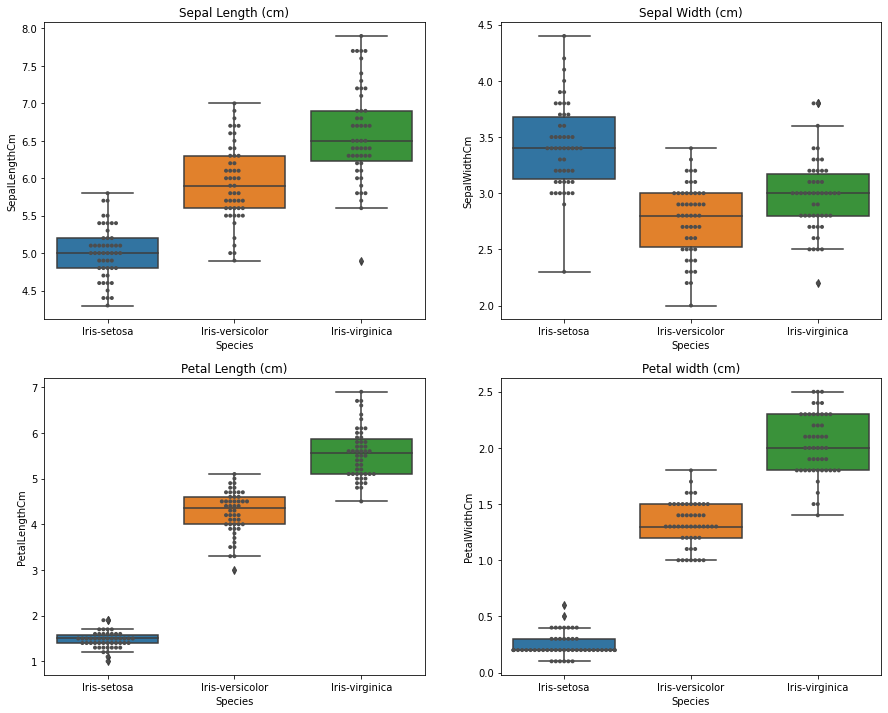

In [57]:
fig, axes = plt.subplots(2,2,figsize=(15,12))

ax = sns.boxplot(x="Species", y="SepalLengthCm", data=data, ax=axes[0,0])
ax = sns.swarmplot(x="Species", y="SepalLengthCm", data=data, color="0.3", size=4, ax=axes[0,0])
axes[0,0].set_title('Sepal Length (cm)')

ax = sns.boxplot(x="Species", y="SepalWidthCm", data=data, ax=axes[0,1])
ax = sns.swarmplot(x="Species", y="SepalWidthCm", data=data, color="0.3", size=4, ax=axes[0,1])
axes[0,1].set_title('Sepal Width (cm)')

ax = sns.boxplot(x="Species", y="PetalLengthCm", data=data, ax=axes[1,0])
ax = sns.swarmplot(x="Species", y="PetalLengthCm", data=data, color="0.3", size=4, ax=axes[1,0])
axes[1,0].set_title('Petal Length (cm)')

ax = sns.boxplot(x="Species", y="PetalWidthCm", data=data, ax=axes[1,1,])
ax = sns.swarmplot(x="Species", y="PetalWidthCm", data=data, color="0.3", size=4, ax=axes[1,1,])
axes[1,1].set_title('Petal width (cm)')

plt.show()

Here, we can see that the sepal-width across species are more or less similar. For other properties, the Iris setosa has a distinct distribution of values. There is a lot of overlapping of values from I. versicolor and I. virginica.

The feature 'Id' is kind of useless and we can get remove it.

In [58]:
data = data.drop('Id', axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Using machine learning for predicting of species from available feature data.

We will first separate the data into features (X) and labels (the species names).

In [59]:
# Separate features and labels
X = (data.drop('Species', axis=1)
     .to_numpy())
#X = np.delete(X,0, axis=1)

labels = data['Species'].to_numpy()



The three species names can be encoded into three categories. The ML algorith finds categorical data easier to work with.

In [60]:
# encode labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_label = LabelEncoder()
enc_ord = OrdinalEncoder()

y_reshaped = labels.reshape(-1,1)
              

y = enc_ord.fit_transform(y_reshaped)

print(f'{X.shape}, {y.shape}')

(150, 4), (150, 1)


### Split the data into training and test data.

We will use 30% of the data for testing the model and 70% of data for training the model.

In this work, I will be using the Losgistic Regression for making the prediction.

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=1)

print(f'{X_train.shape}, {y_train.shape}')
print(f'{X_test.shape}, {y_test.shape}')

(105, 4), (105, 1)
(45, 4), (45, 1)


### Train model with logistic regression

In [62]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

### Use the test data to predict the respective species.

We will use accuracy_score as metric for calculating the prediction accuracy.

In [63]:
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, pred)
score

0.9777777777777777

### Confusion matrix to visualize the predictions.

We will first print what category values the encoder has assigned to each species.

In [64]:
a = np.array([0,1,2]).reshape(-1,1)
b = enc_ord.inverse_transform(a)

for cat, name in zip(a,b):
    
    print(cat[0], ": ", name[0])

0 :  Iris-setosa
1 :  Iris-versicolor
2 :  Iris-virginica


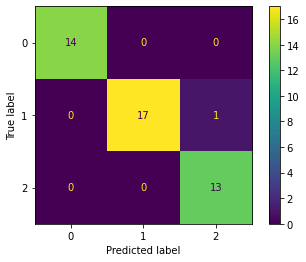

In [65]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [66]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualize decision boudaries by generating pseudo-data points.

It may not be realistic but it would be fun to test.


In [67]:
size = 5000 # pseudo-data size
#**********************************
# Iris-setosa
spll_setosa = (data
             .loc[data['Species']=='Iris-setosa']
              ['SepalLengthCm']
              .to_numpy()
             )

ps_SepalLengthCm_setosa = np.random.normal(loc=spll_setosa.mean(),
                                          scale=spll_setosa.std(),
                                          size=size)


splw_setosa = (data
             .loc[data['Species']=='Iris-setosa']
              ['SepalWidthCm']
              .to_numpy()
             )

ps_SepalWidthCm_setosa = np.random.normal(loc=splw_setosa.mean(),
                                          scale=splw_setosa.std(),
                                          size=size)


ptll_setosa = (data
             .loc[data['Species']=='Iris-setosa']
              ['PetalLengthCm']
              .to_numpy()
             )

ps_PetalLengthCm_setosa = np.random.normal(loc=ptll_setosa.mean(),
                                          scale=ptll_setosa.std(),
                                          size=size)


ptlw_setosa = (data
             .loc[data['Species']=='Iris-setosa']
              ['PetalWidthCm']
              .to_numpy()
             )

ps_PetalWidthCm_setosa = np.random.normal(loc=ptlw_setosa.mean(),
                                          scale=ptlw_setosa.std(),
                                          size=size)


#**********************************


# Iris-versicolor
spll_versicolor = (data
             .loc[data['Species']=='Iris-versicolor']
              ['SepalLengthCm']
              .to_numpy()
             )

ps_SepalLengthCm_versicolor = np.random.normal(loc=spll_versicolor.mean(),
                                          scale=spll_versicolor.std(),
                                          size=size)


splw_versicolor = (data
             .loc[data['Species']=='Iris-versicolor']
              ['SepalWidthCm']
              .to_numpy()
             )

ps_SepalWidthCm_versicolor = np.random.normal(loc=splw_versicolor.mean(),
                                          scale=splw_versicolor.std(),
                                          size=size)


ptll_versicolor = (data
             .loc[data['Species']=='Iris-versicolor']
              ['PetalLengthCm']
              .to_numpy()
             )

ps_PetalLengthCm_versicolor = np.random.normal(loc=ptll_versicolor.mean(),
                                          scale=ptll_versicolor.std(),
                                          size=size)


ptlw_versicolor = (data
             .loc[data['Species']=='Iris-versicolor']
              ['PetalWidthCm']
              .to_numpy()
             )

ps_PetalWidthCm_versicolor = np.random.normal(loc=ptlw_versicolor.mean(),
                                          scale=ptlw_versicolor.std(),
                                          size=size)


#**********************************
# Iris-virginica
spll_virginica = (data
             .loc[data['Species']=='Iris-virginica']
              ['SepalLengthCm']
              .to_numpy()
             )

ps_SepalLengthCm_virginica = np.random.normal(loc=spll_virginica.mean(),
                                          scale=spll_virginica.std(),
                                          size=size)


splw_virginica = (data
             .loc[data['Species']=='Iris-virginica']
              ['SepalWidthCm']
              .to_numpy()
             )

ps_SepalWidthCm_virginica = np.random.normal(loc=splw_virginica.mean(),
                                          scale=splw_virginica.std(),
                                          size=size)


ptll_virginica = (data
             .loc[data['Species']=='Iris-virginica']
              ['PetalLengthCm']
              .to_numpy()
             )

ps_PetalLengthCm_virginica = np.random.normal(loc=ptll_virginica.mean(),
                                          scale=ptll_virginica.std(),
                                          size=size)


ptlw_virginica = (data
             .loc[data['Species']=='Iris-virginica']
              ['PetalWidthCm']
              .to_numpy()
             )

ps_PetalWidthCm_virginica = np.random.normal(loc=ptlw_virginica.mean(),
                                          scale=ptlw_virginica.std(),
                                          size=size)


# the labels
ps_setosa_lbl = np.array([0]*size)
ps_versicolor_lbl = np.array([1]*size)
ps_virginica_lbl = np.array([2]*size)

ps_lbl = np.concatenate((ps_setosa_lbl,
                        ps_versicolor_lbl,
                        ps_virginica_lbl))
ps_lbl

array([0, 0, 0, ..., 2, 2, 2])

In [68]:
# now append the generated values and make a dataframe

ps_SepalLengthCm = np.concatenate((ps_SepalLengthCm_setosa,
                                   ps_SepalLengthCm_versicolor,
                                   ps_SepalLengthCm_virginica))

ps_SepalWidthCm = np.concatenate((ps_SepalWidthCm_setosa,
                                 ps_SepalWidthCm_versicolor,
                                 ps_SepalWidthCm_virginica))

ps_PetalLengthCm = np.concatenate((ps_PetalLengthCm_setosa,
                                  ps_PetalLengthCm_versicolor,
                                  ps_PetalLengthCm_virginica))

ps_PetalWidthCm = np.concatenate((ps_PetalWidthCm_setosa,
                                 ps_PetalWidthCm_versicolor,
                                 ps_PetalWidthCm_virginica))

ps_data = pd.DataFrame()
ps_data['SepalLengthCm'] = ps_SepalLengthCm
ps_data['SepalWidthCm'] = ps_SepalWidthCm
ps_data['PetalLengthCm'] = ps_PetalLengthCm
ps_data['PetalWidthCm'] = ps_PetalWidthCm
ps_data['Species'] = ps_lbl

ps_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.876800,3.859028,1.330221,0.130964,0
1,5.446130,3.535547,1.477237,0.292375,0
2,4.873422,3.240727,1.382325,0.307514,0
3,5.142652,3.412645,1.322006,0.143227,0
4,5.087003,3.071993,1.523437,0.407934,0


In [69]:
# again print the info
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  15000 non-null  float64
 1   SepalWidthCm   15000 non-null  float64
 2   PetalLengthCm  15000 non-null  float64
 3   PetalWidthCm   15000 non-null  float64
 4   Species        15000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


## Plot the distribution of values

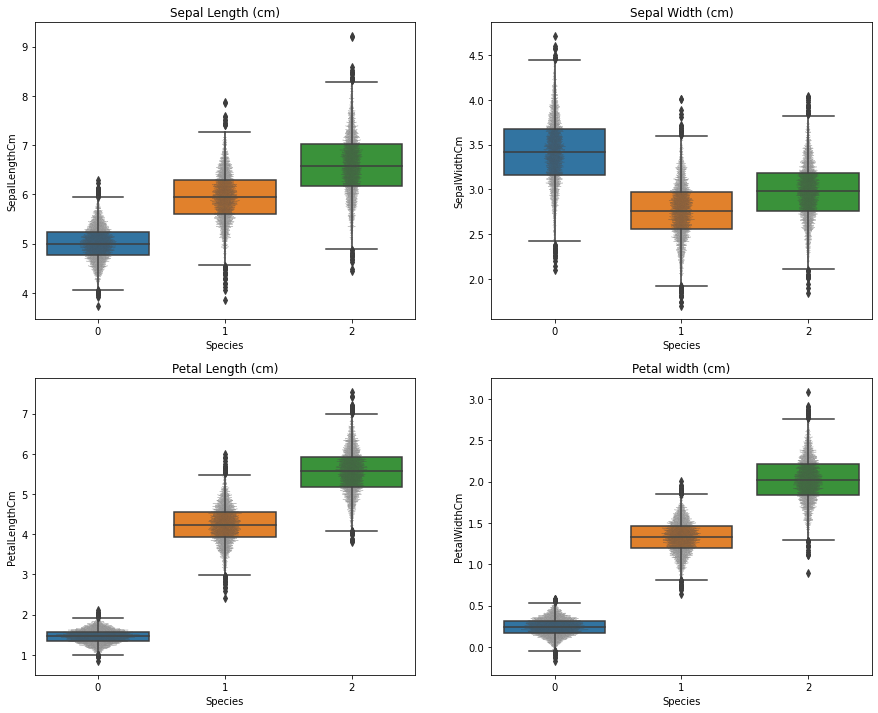

In [70]:
fig, axes = plt.subplots(2,2,figsize=(15,12))

ax = sns.boxplot(x="Species", y="SepalLengthCm", data=ps_data, ax=axes[0,0])
ax = sns.swarmplot(x="Species", y="SepalLengthCm", data=ps_data, color="0.3", size=0.5, ax=axes[0,0])
axes[0,0].set_title('Sepal Length (cm)')

ax = sns.boxplot(x="Species", y="SepalWidthCm", data=ps_data, ax=axes[0,1])
ax = sns.swarmplot(x="Species", y="SepalWidthCm", data=ps_data, color="0.3", size=0.5, ax=axes[0,1])
axes[0,1].set_title('Sepal Width (cm)')

ax = sns.boxplot(x="Species", y="PetalLengthCm", data=ps_data, ax=axes[1,0])
ax = sns.swarmplot(x="Species", y="PetalLengthCm", data=ps_data, color="0.3", size=0.5, ax=axes[1,0])
axes[1,0].set_title('Petal Length (cm)')

ax = sns.boxplot(x="Species", y="PetalWidthCm", data=ps_data, ax=axes[1,1,])
ax = sns.swarmplot(x="Species", y="PetalWidthCm", data=ps_data, color="0.3", size=0.5, ax=axes[1,1,])
axes[1,1].set_title('Petal width (cm)')

plt.show()

In [71]:
# predict the species from pseudo-data
ps_X = ps_data.drop('Species', axis=1).to_numpy()
ps_y = ps_data['Species']

ps_pred = model.predict(ps_X)

ps_accuracy = accuracy_score(ps_y, ps_pred)
ps_accuracy

0.9632666666666667

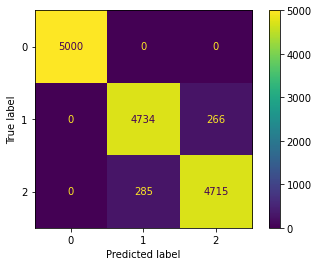

In [72]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ps_cm = confusion_matrix(ps_y, ps_pred)

cm_display = ConfusionMatrixDisplay(ps_cm).plot()

In [73]:
ps_data['predicted'] = enc_ord.inverse_transform(ps_pred.reshape(-1,1))
ps_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
0,4.876800,3.859028,1.330221,0.130964,0,Iris-setosa
1,5.446130,3.535547,1.477237,0.292375,0,Iris-setosa
2,4.873422,3.240727,1.382325,0.307514,0,Iris-setosa
3,5.142652,3.412645,1.322006,0.143227,0,Iris-setosa
4,5.087003,3.071993,1.523437,0.407934,0,Iris-setosa


## Plot the feature against each other coloured with predicted classification.

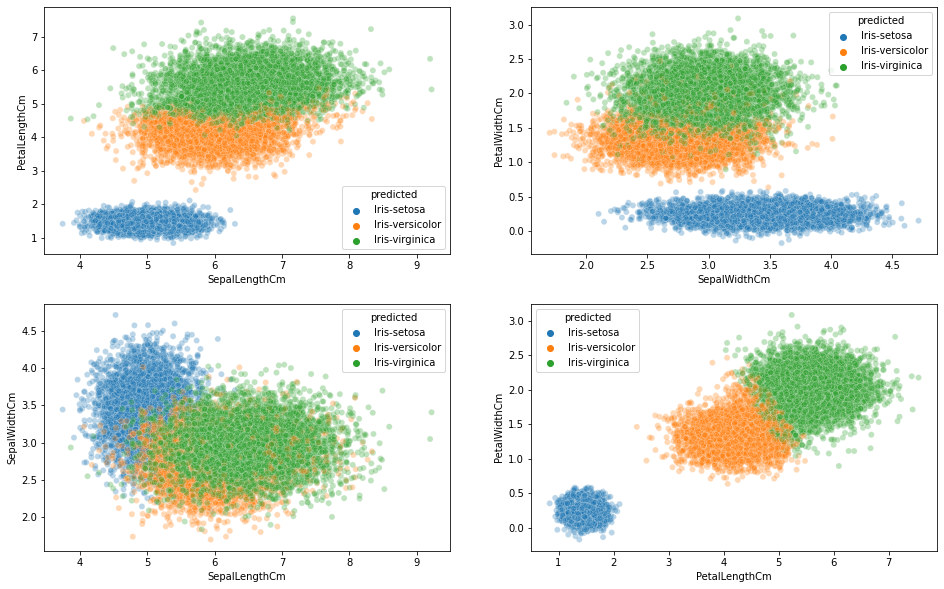

In [77]:
fig, ax = plt.subplots(2,2, figsize=(16,10))
sns.scatterplot(data=ps_data,
                x='SepalLengthCm',
                y='PetalLengthCm',
                hue='predicted',
                ax=ax[0,0],
                alpha=0.3)

sns.scatterplot(data=ps_data,
                x='SepalWidthCm',
                y='PetalWidthCm',
                hue='predicted',
                ax=ax[0,1],
                alpha=0.3)

sns.scatterplot(data=ps_data,
                x='SepalLengthCm',
                y='SepalWidthCm',
                hue='predicted',
                ax=ax[1,0],
                alpha=0.3)

sns.scatterplot(data=ps_data,
                x='PetalLengthCm',
                y='PetalWidthCm',
                hue='predicted',
                ax=ax[1,1],
                alpha=0.3)


plt.show()